In [538]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.pipeline import Pipeline  
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer, ColumnTransformer  
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, VotingRegressor, StackingRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
import lightgbm as lgb


In [539]:
train_df = pd.read_csv('./train.csv')
test_df = pd.read_csv('./test.csv')  
print(train_df.head())
print(test_df.head())

   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD   

In [540]:
print(train_df.info())
print(train_df.columns)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [541]:
print(train_df.describe())
print(train_df.describe(include=['object']))

                Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  ...  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000  ...   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726  ...   
std       1.112799    30.202904     20.645407   181.066207   456.098091  ..

In [542]:
print((train_df.isnull().sum() / len(train_df)) * 100)

Id                0.000000
MSSubClass        0.000000
MSZoning          0.000000
LotFrontage      17.739726
LotArea           0.000000
                   ...    
MoSold            0.000000
YrSold            0.000000
SaleType          0.000000
SaleCondition     0.000000
SalePrice         0.000000
Length: 81, dtype: float64


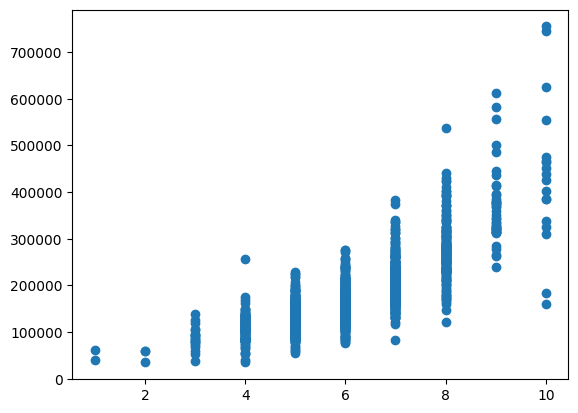

In [543]:
plt.scatter(x="OverallQual" , y="SalePrice", data=train_df)

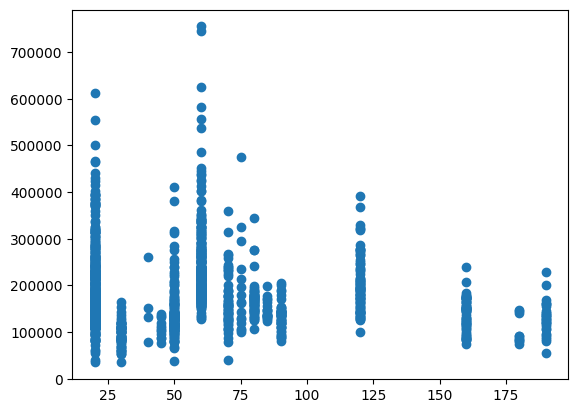

In [544]:
plt.scatter(x="MSSubClass" , y="SalePrice", data=train_df)

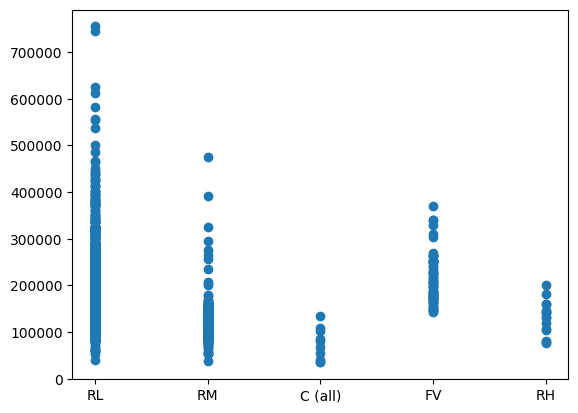

In [545]:
plt.scatter(x="MSZoning" , y="SalePrice", data=train_df)

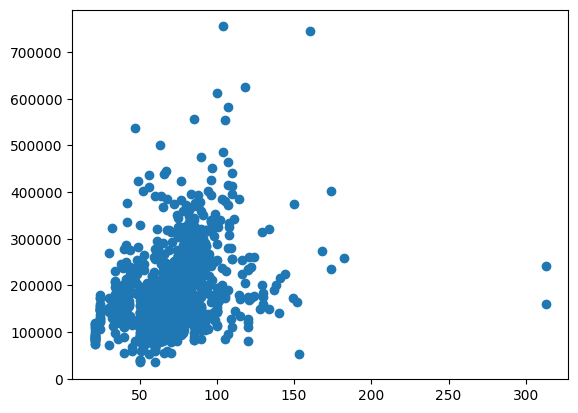

In [546]:
plt.scatter(x="LotFrontage" , y="SalePrice", data=train_df)

In [547]:
train_df.query("LotFrontage > 300")
# 20 60 

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
934,935,20,RL,313.0,27650,Pave,NaN,IR2,HLS,AllPub,...,0,NaN,NaN,NaN,0,11,2008,WD,Normal,242000
1298,1299,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,...,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000


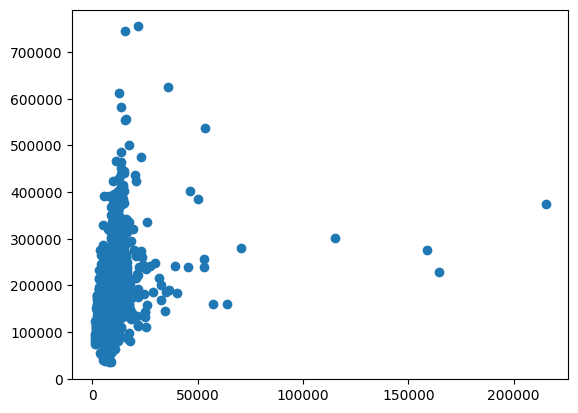

In [548]:
plt.scatter(x="LotArea" , y="SalePrice", data=train_df)

In [549]:
train_df.query("LotArea > 100000")
#  

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
249,250,50,RL,NaN,159000,Pave,NaN,IR2,Low,AllPub,...,0,NaN,NaN,Shed,500,6,2007,WD,Normal,277000
313,314,20,RL,150.0,215245,Pave,NaN,IR3,Low,AllPub,...,0,NaN,NaN,NaN,0,6,2009,WD,Normal,375000
335,336,190,RL,NaN,164660,Grvl,NaN,IR1,HLS,AllPub,...,0,NaN,NaN,Shed,700,8,2008,WD,Normal,228950
706,707,20,RL,NaN,115149,Pave,NaN,IR2,Low,AllPub,...,0,NaN,NaN,NaN,0,6,2007,WD,Normal,302000


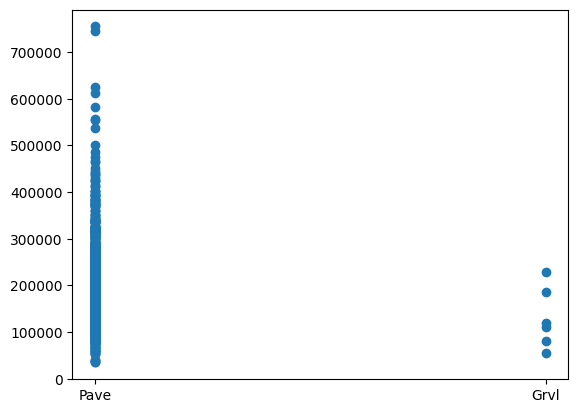

In [550]:
plt.scatter(x="Street" , y="SalePrice", data=train_df)

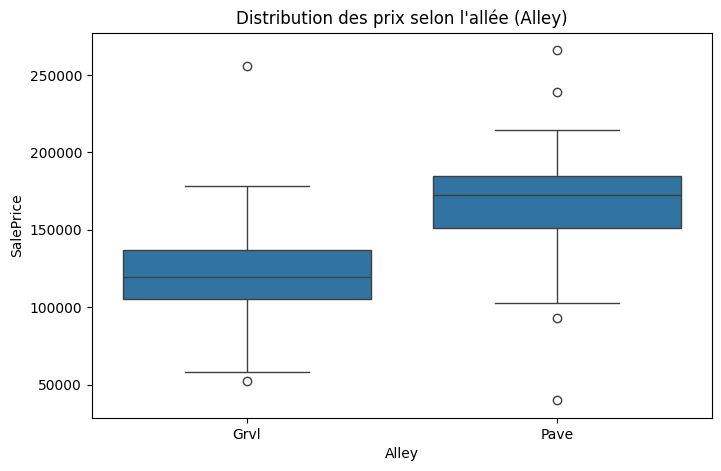

In [551]:
plt.figure(figsize=(8,5))
sns.boxplot(x="Alley", y="SalePrice", data=train_df)
plt.title("Distribution des prix selon l'allée (Alley)")
plt.show()

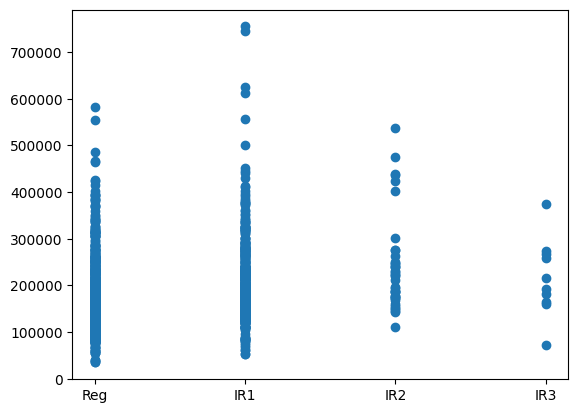

In [552]:
plt.scatter(x="LotShape" , y="SalePrice", data=train_df)

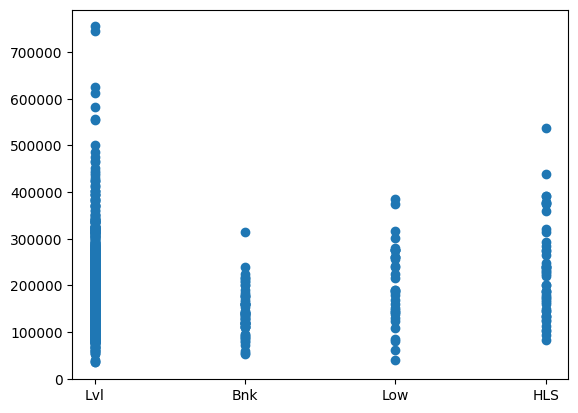

In [553]:
plt.scatter(x="LandContour" , y="SalePrice", data=train_df)

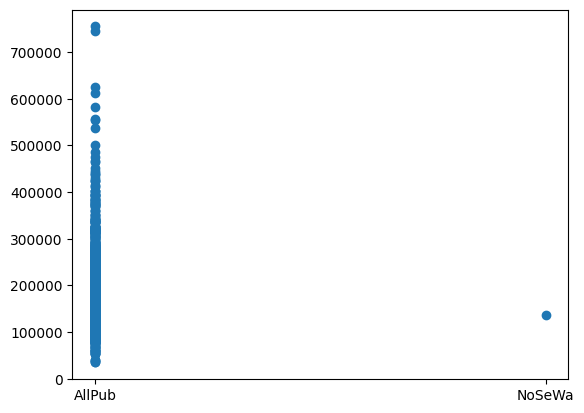

In [554]:
plt.scatter(x="Utilities" , y="SalePrice", data=train_df)

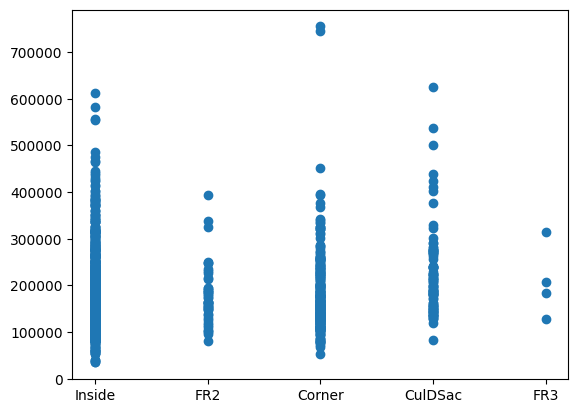

In [555]:
plt.scatter(x="LotConfig" , y="SalePrice", data=train_df)

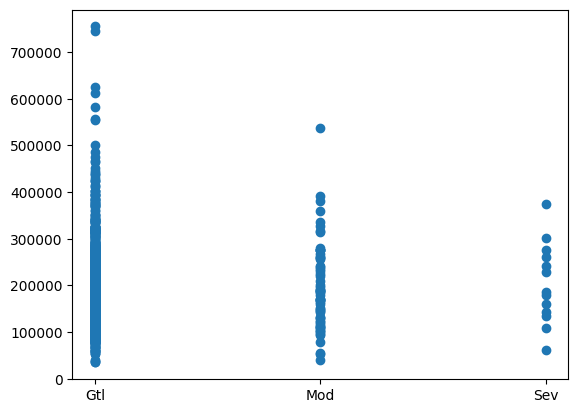

In [556]:
plt.scatter(x="LandSlope" , y="SalePrice", data=train_df)

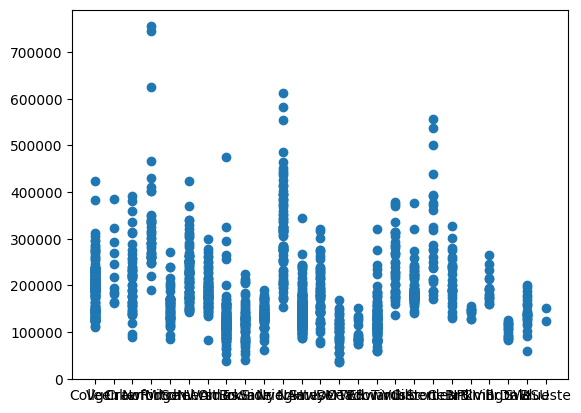

In [557]:
plt.scatter(x="Neighborhood" , y="SalePrice", data=train_df)

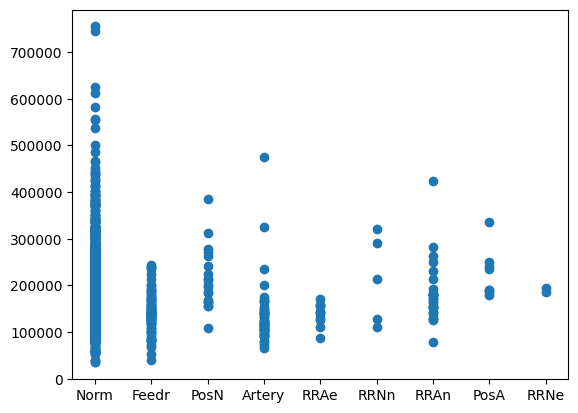

In [558]:
plt.scatter(x="Condition1" , y="SalePrice", data=train_df)

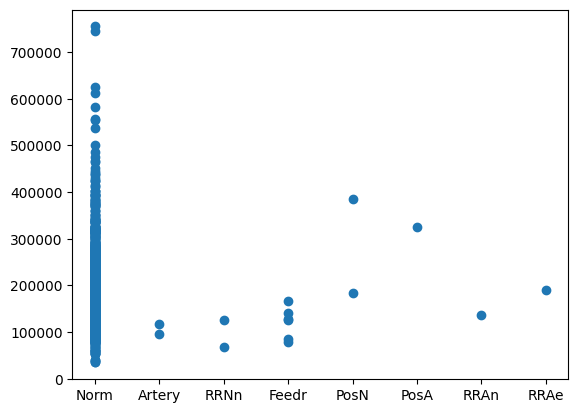

In [559]:
plt.scatter(x="Condition2" , y="SalePrice", data=train_df)

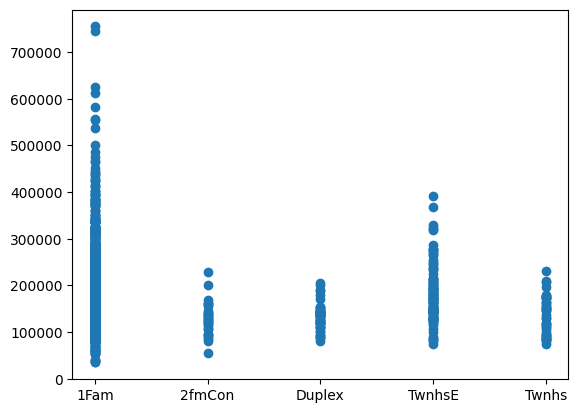

In [560]:
plt.scatter(x="BldgType" , y="SalePrice", data=train_df)

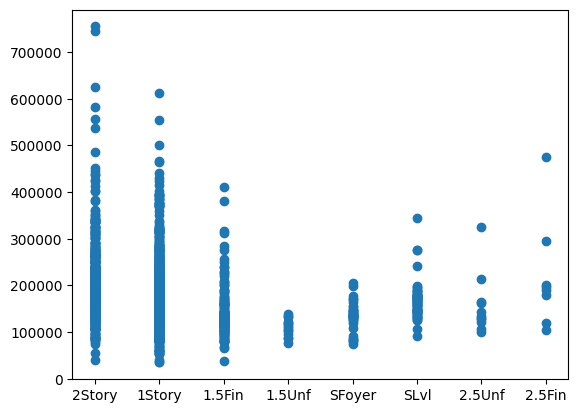

In [561]:
plt.scatter(x="HouseStyle" , y="SalePrice", data=train_df)

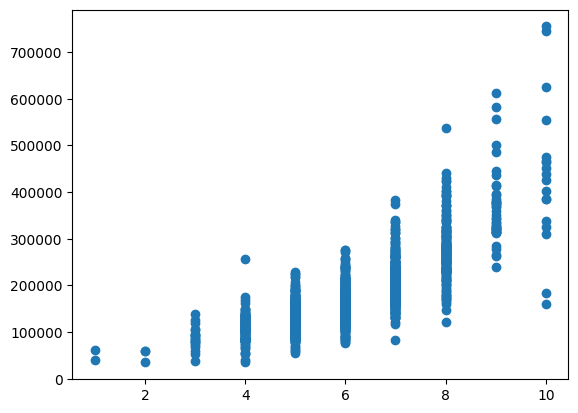

In [562]:
plt.scatter(x="OverallQual" , y="SalePrice", data=train_df)

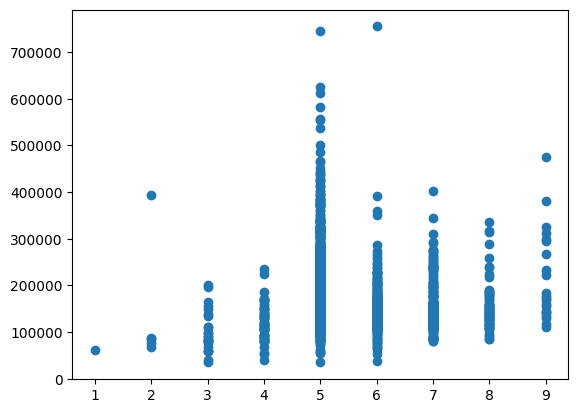

In [563]:
plt.scatter(x="OverallCond" , y="SalePrice", data=train_df)

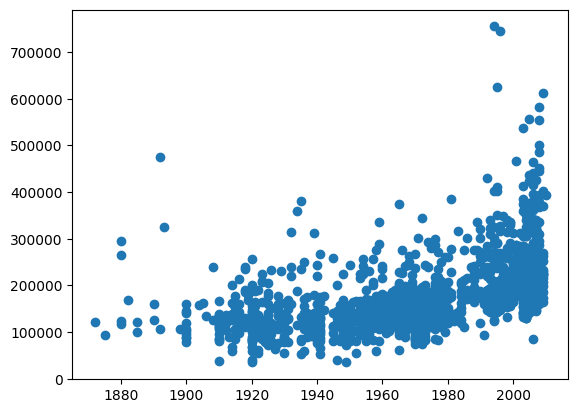

In [564]:
plt.scatter(x="YearBuilt" , y="SalePrice", data=train_df)

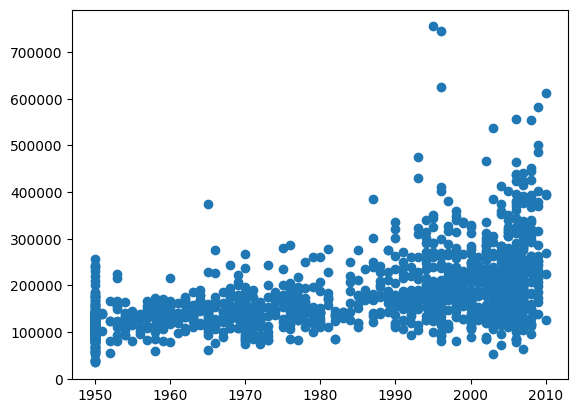

In [565]:
plt.scatter(x="YearRemodAdd" , y="SalePrice", data=train_df)

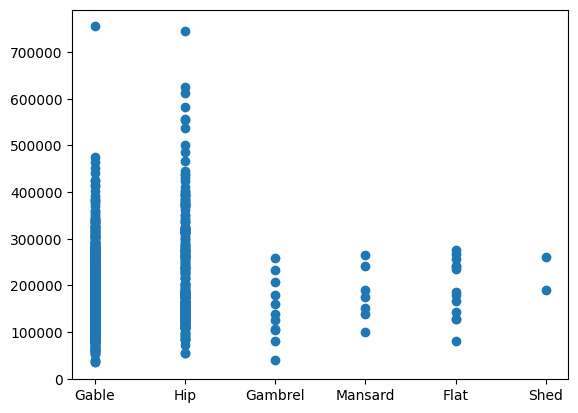

In [566]:
plt.scatter(x="RoofStyle" , y="SalePrice", data=train_df)

In [567]:
train_df.query("RoofStyle == 'Shed'")

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1230,1231,90,RL,NaN,18890,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Gar2,8300,8,2007,WD,Normal,190000
1270,1271,40,RL,NaN,23595,Pave,NaN,Reg,Low,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,260000


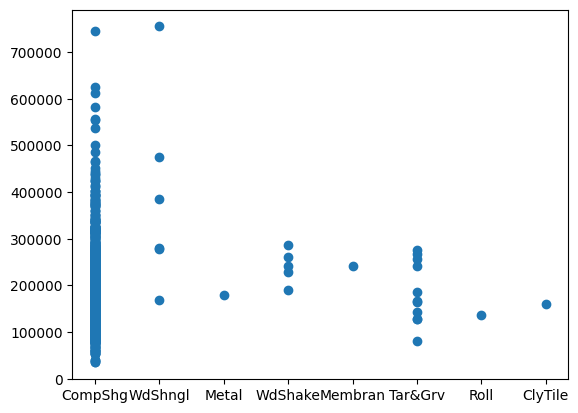

In [568]:
plt.scatter(x="RoofMatl" , y="SalePrice", data=train_df)

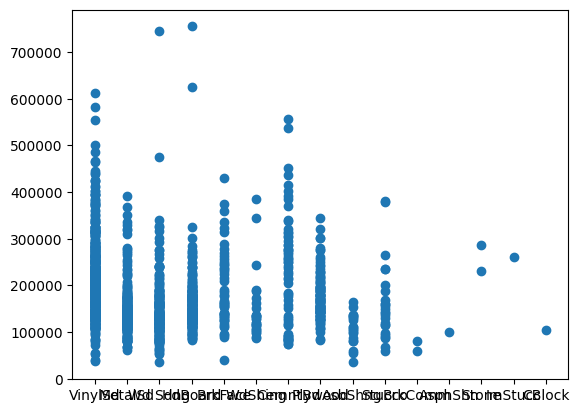

In [569]:
plt.scatter(x="Exterior1st" , y="SalePrice", data=train_df)

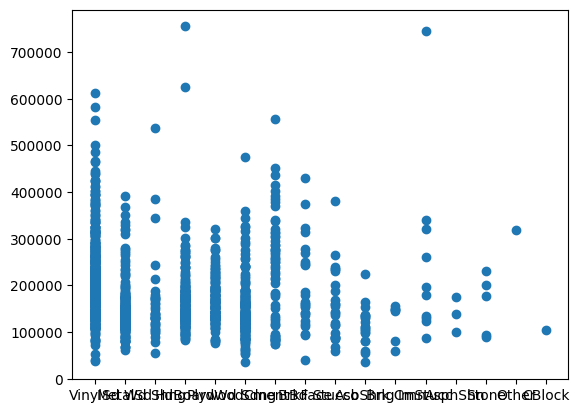

In [570]:
plt.scatter(x="Exterior2nd" , y="SalePrice", data=train_df)

In [571]:
# plt.scatter(x="MasVnrType" , y="SalePrice", data=train_df)

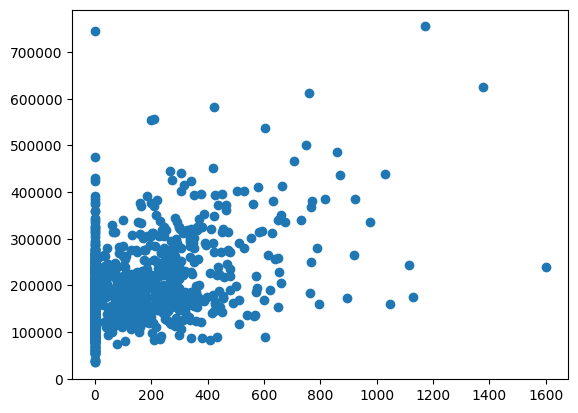

In [572]:
plt.scatter(x="MasVnrArea" , y="SalePrice", data=train_df)

In [573]:
train_df.query("MasVnrArea > 1200")
# 

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
297,298,60,FV,66.0,7399,Pave,Pave,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2007,WD,Normal,239000
1169,1170,60,RL,118.0,35760,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2006,WD,Normal,625000


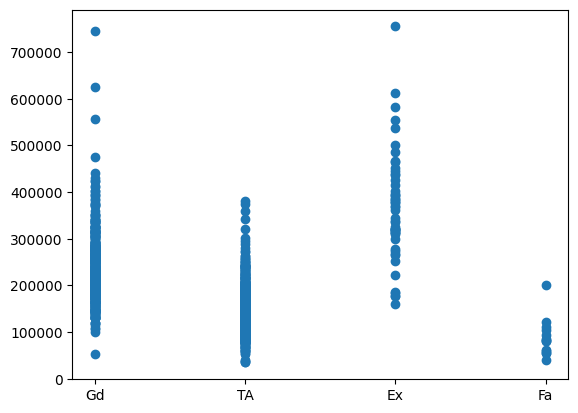

In [574]:
plt.scatter(x="ExterQual" , y="SalePrice", data=train_df)

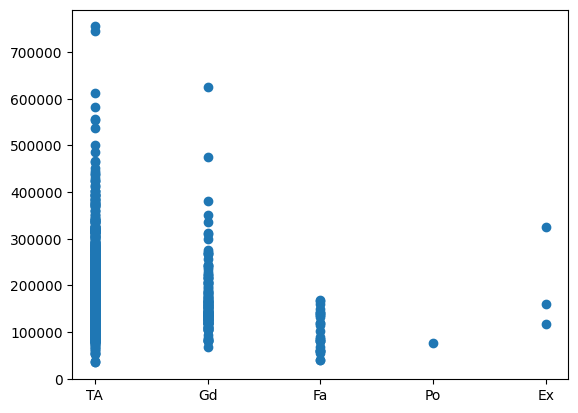

In [575]:
plt.scatter(x="ExterCond" , y="SalePrice", data=train_df)

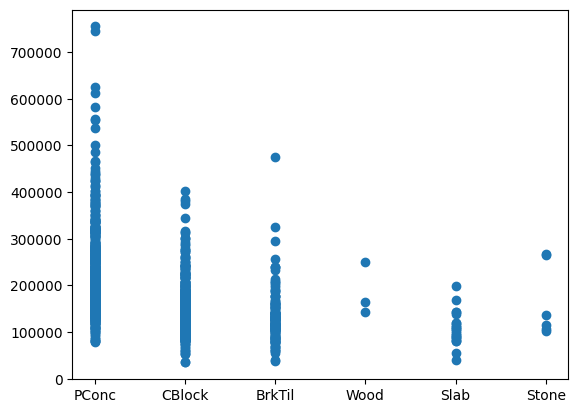

In [576]:
plt.scatter(x="Foundation" , y="SalePrice", data=train_df)

In [577]:
# plt.scatter(x="BsmtQual" , y="SalePrice", data=train_df)

In [578]:
# plt.scatter(x="BsmtCond" , y="SalePrice", data=train_df)

In [579]:
# plt.scatter(x="BsmtExposure" , y="SalePrice", data=train_df)

In [580]:
# plt.scatter(x="BsmtFinType1" , y="SalePrice", data=train_df)

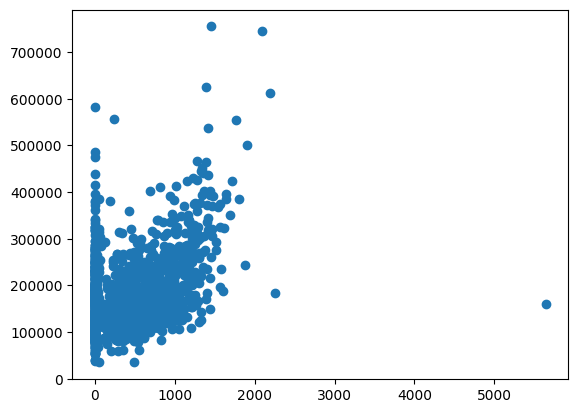

In [581]:
plt.scatter(x="BsmtFinSF1" , y="SalePrice", data=train_df)

In [582]:
train_df.query("BsmtFinSF1 > 5000")
# 

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1298,1299,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,...,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000


In [583]:
# plt.scatter(x="BsmtFinType2" , y="SalePrice", data=train_df)

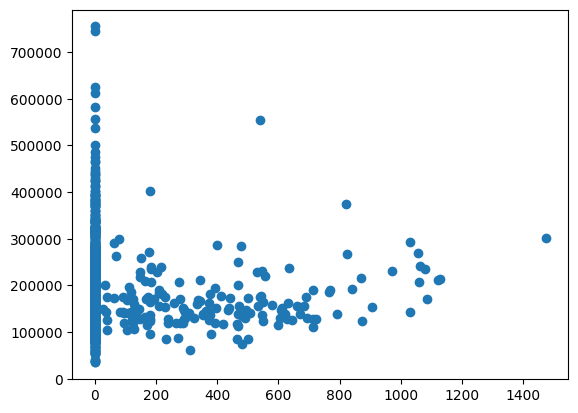

In [584]:
plt.scatter(x="BsmtFinSF2" , y="SalePrice", data=train_df)

In [585]:
train_df.query("BsmtFinSF2 > 1200")
# 

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
322,323,60,RL,86.0,10380,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,8,2007,WD,Normal,301000


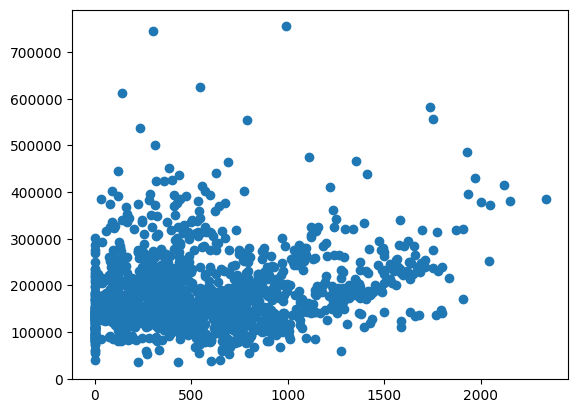

In [586]:
plt.scatter(x="BsmtUnfSF" , y="SalePrice", data=train_df)

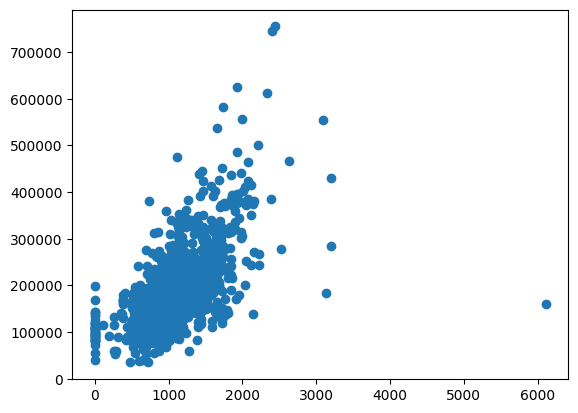

In [587]:
plt.scatter(x="TotalBsmtSF" , y="SalePrice", data=train_df)

In [588]:
train_df.query("TotalBsmtSF > 6000")


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1298,1299,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,...,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000


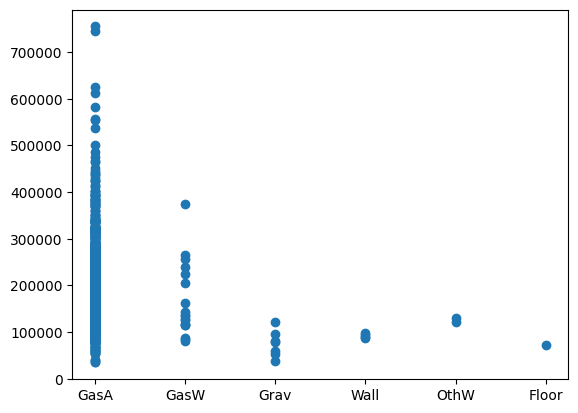

In [589]:
plt.scatter(x="Heating" , y="SalePrice", data=train_df)

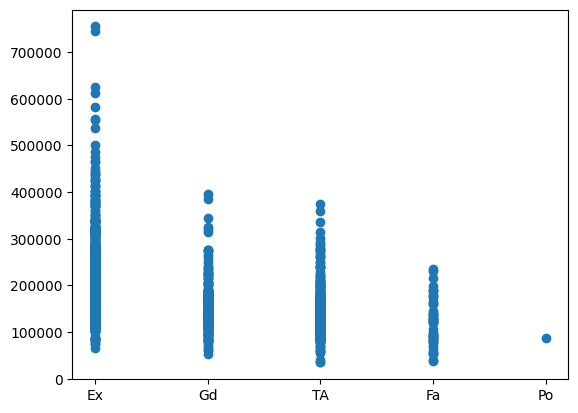

In [590]:
plt.scatter(x="HeatingQC" , y="SalePrice", data=train_df)

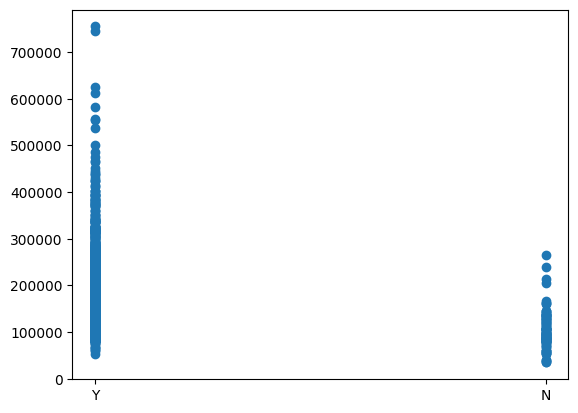

In [591]:
plt.scatter(x="CentralAir" , y="SalePrice", data=train_df)

In [592]:
# plt.scatter(x="Electrical" , y="SalePrice", data=train_df)

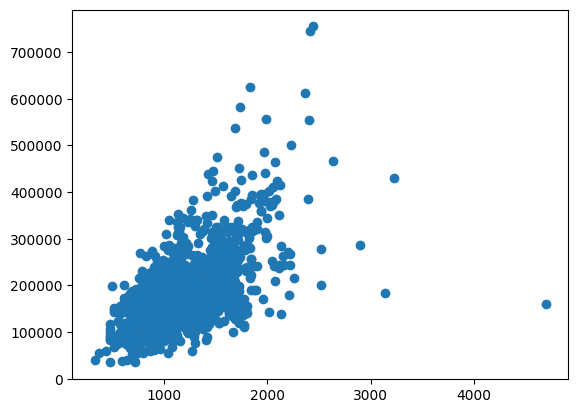

In [593]:
plt.scatter(x="1stFlrSF" , y="SalePrice", data=train_df)

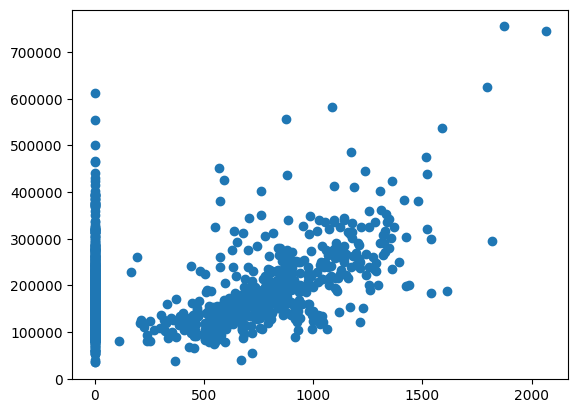

In [594]:
plt.scatter(x="2ndFlrSF" , y="SalePrice", data=train_df)

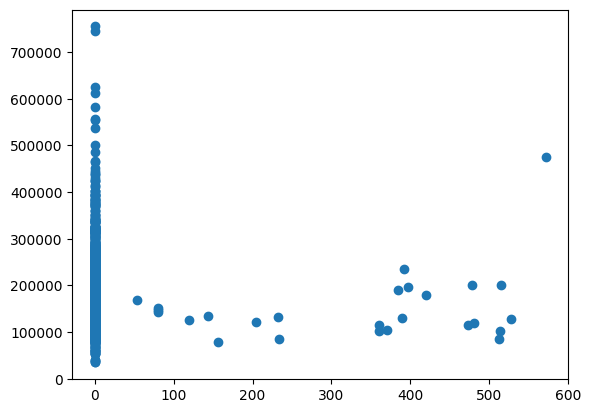

In [595]:
plt.scatter(x="LowQualFinSF" , y="SalePrice", data=train_df)

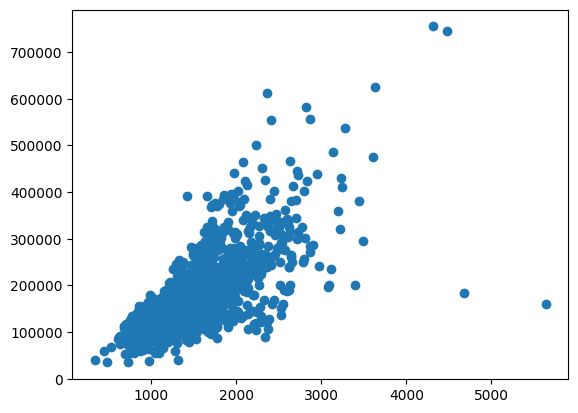

In [596]:
plt.scatter(x="GrLivArea" , y="SalePrice", data=train_df)

In [597]:
train_df.query("GrLivArea > 4000")
# 

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
523,524,60,RL,130.0,40094,Pave,NaN,IR1,Bnk,AllPub,...,0,NaN,NaN,NaN,0,10,2007,New,Partial,184750
691,692,60,RL,104.0,21535,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2007,WD,Normal,755000
1182,1183,60,RL,160.0,15623,Pave,NaN,IR1,Lvl,AllPub,...,555,Ex,MnPrv,NaN,0,7,2007,WD,Abnorml,745000
1298,1299,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,...,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000


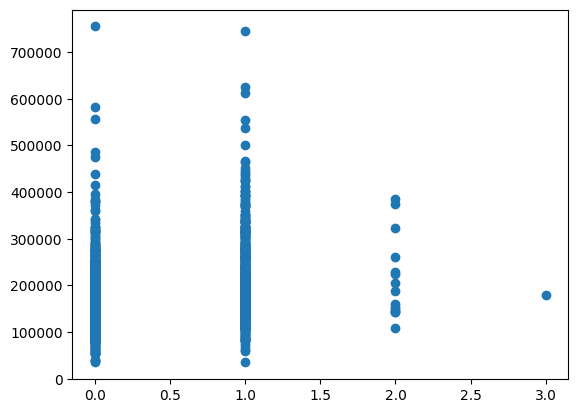

In [598]:
    plt.scatter(x="BsmtFullBath" , y="SalePrice", data=train_df)

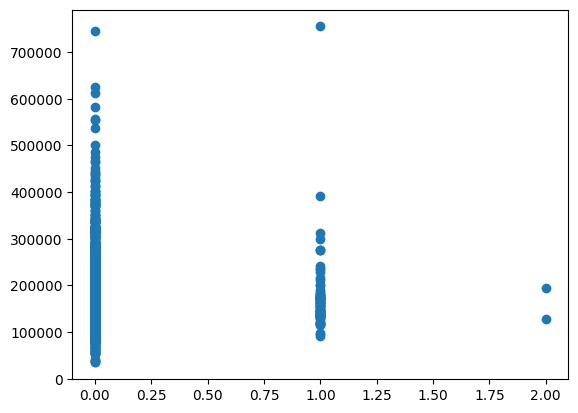

In [599]:
plt.scatter(x="BsmtHalfBath" , y="SalePrice", data=train_df)

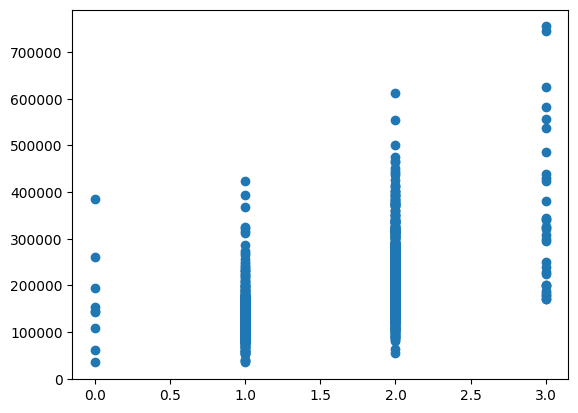

In [600]:
plt.scatter(x="FullBath" , y="SalePrice", data=train_df)

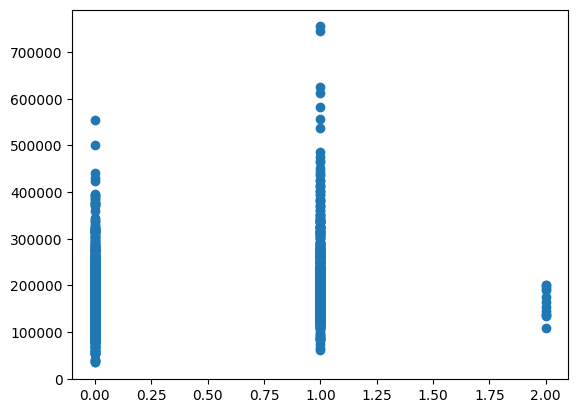

In [601]:
plt.scatter(x="HalfBath" , y="SalePrice", data=train_df)

In [602]:
# plt.scatter(x="Bedroom" , y="SalePrice", data=train_df)

In [603]:
# plt.scatter(x="Kitchen" , y="SalePrice", data=train_df)

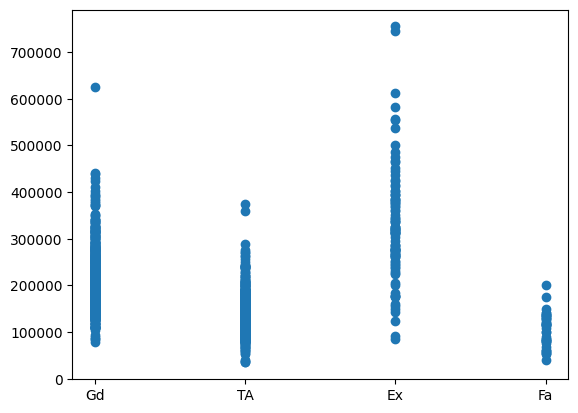

In [604]:
plt.scatter(x="KitchenQual" , y="SalePrice", data=train_df)

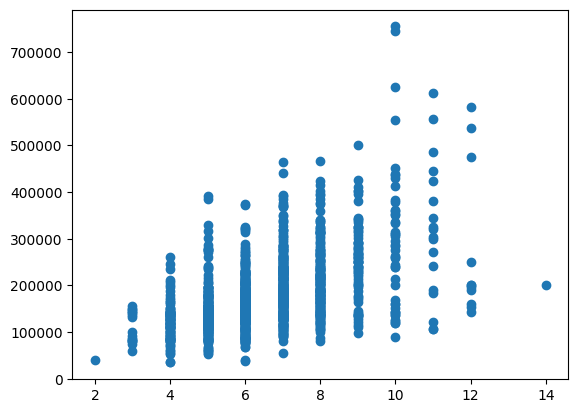

In [605]:
plt.scatter(x="TotRmsAbvGrd" , y="SalePrice", data=train_df)

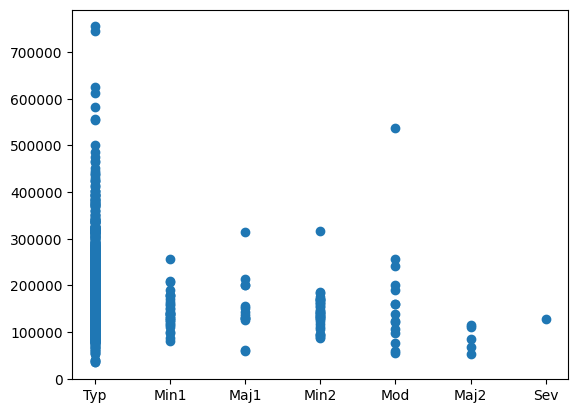

In [606]:
plt.scatter(x="Functional" , y="SalePrice", data=train_df)

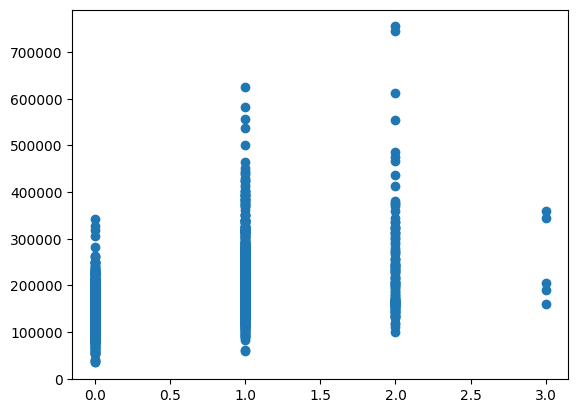

In [607]:
plt.scatter(x="Fireplaces" , y="SalePrice", data=train_df)

In [608]:
# plt.scatter(x="FireplaceQu" , y="SalePrice", data=train_df)

In [609]:
# plt.scatter(x="GarageType" , y="SalePrice", data=train_df)

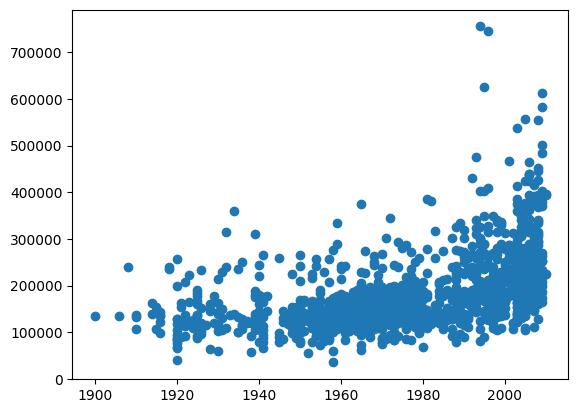

In [610]:
plt.scatter(x="GarageYrBlt" , y="SalePrice", data=train_df)

In [611]:
# plt.scatter(x="GarageFinish" , y="SalePrice", data=train_df)

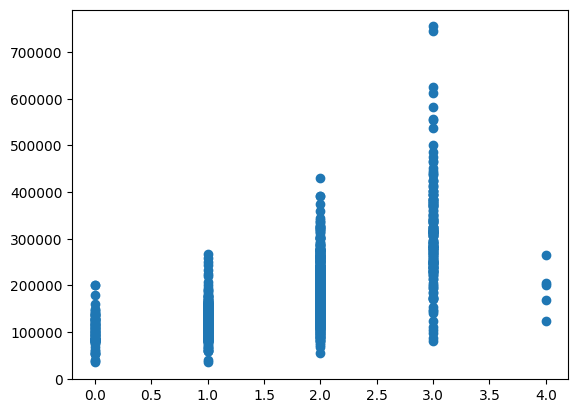

In [612]:
plt.scatter(x="GarageCars" , y="SalePrice", data=train_df)

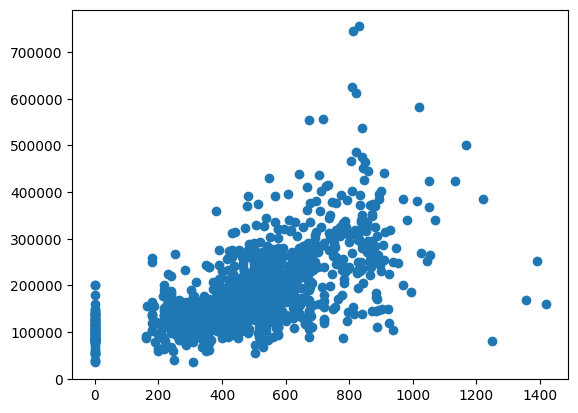

In [613]:
plt.scatter(x="GarageArea" , y="SalePrice", data=train_df)

In [614]:
# plt.scatter(x="GarageQual" , y="SalePrice", data=train_df)

In [615]:
# plt.scatter(x="GarageCond" , y="SalePrice", data=train_df)

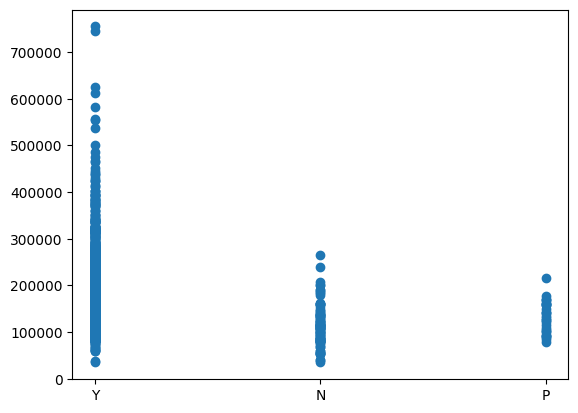

In [616]:
plt.scatter(x="PavedDrive" , y="SalePrice", data=train_df)

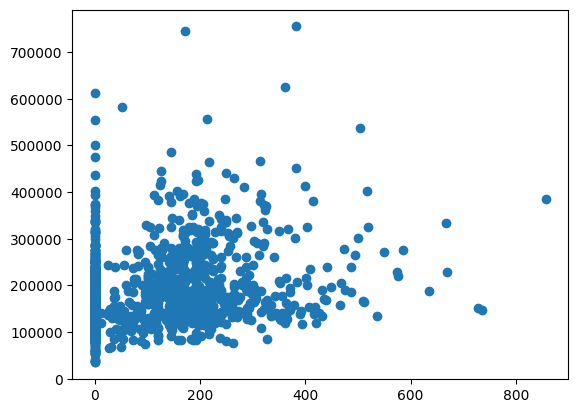

In [617]:
plt.scatter(x="WoodDeckSF" , y="SalePrice", data=train_df)

In [618]:
train_df.query("WoodDeckSF > 800")
#

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
53,54,20,RL,68.0,50271,Pave,NaN,IR1,Low,AllPub,...,0,NaN,NaN,NaN,0,11,2006,WD,Normal,385000


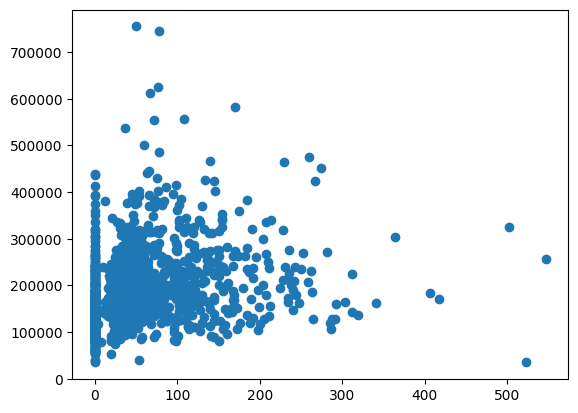

In [619]:
plt.scatter(x="OpenPorchSF" , y="SalePrice", data=train_df)

In [620]:
train_df.query("OpenPorchSF > 500")


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
495,496,30,C (all),60.0,7879,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdWo,NaN,0,11,2009,WD,Abnorml,34900
583,584,75,RM,75.0,13500,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2008,WD,Normal,325000
1328,1329,50,RM,60.0,10440,Pave,Grvl,Reg,Lvl,AllPub,...,0,NaN,MnPrv,Shed,1150,6,2008,WD,Normal,256000


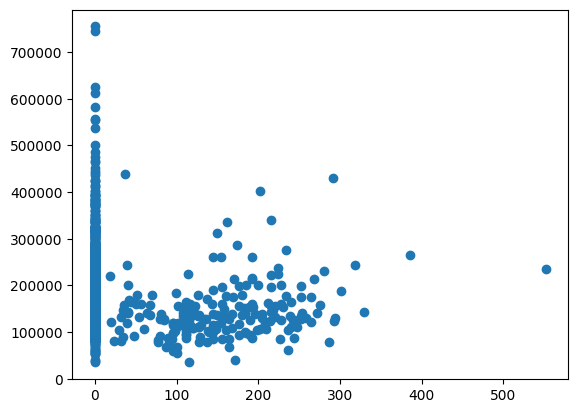

In [621]:
plt.scatter(x="EnclosedPorch" , y="SalePrice", data=train_df)

In [622]:
train_df.query("EnclosedPorch > 500")
#

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
197,198,75,RL,174.0,25419,Pave,NaN,Reg,Lvl,AllPub,...,512,Ex,GdPrv,NaN,0,3,2006,WD,Abnorml,235000


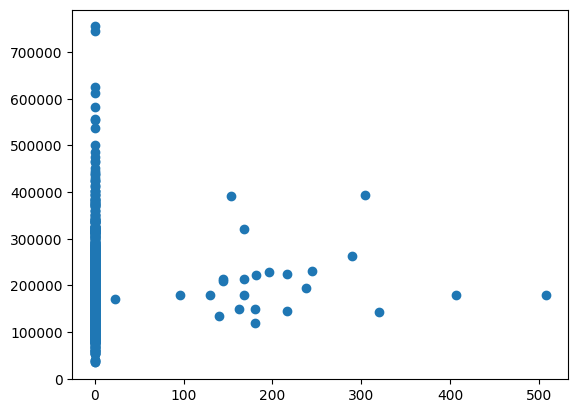

In [623]:
plt.scatter(x="3SsnPorch" , y="SalePrice", data=train_df)

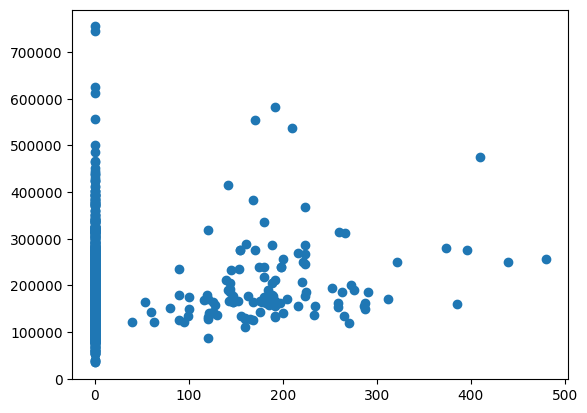

In [624]:
plt.scatter(x="ScreenPorch" , y="SalePrice", data=train_df)

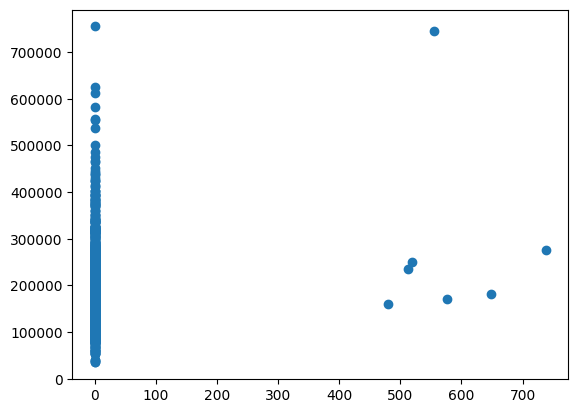

In [625]:
plt.scatter(x="PoolArea" , y="SalePrice", data=train_df)

In [626]:
# plt.scatter(x="PoolQC" , y="SalePrice", data=train_df)

In [627]:
# plt.scatter(x="Fence" , y="SalePrice", data=train_df)

In [628]:
# plt.scatter(x="MiscFeature" , y="SalePrice", data=train_df)

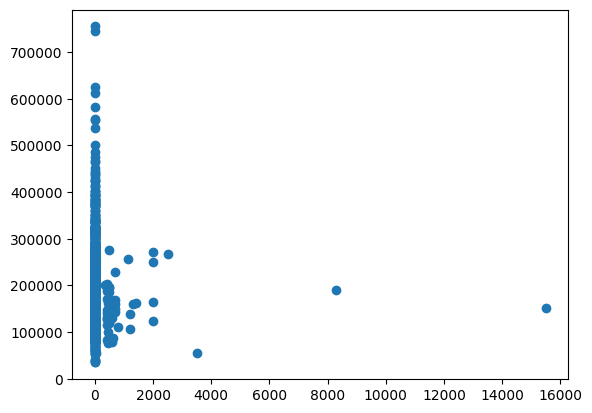

In [629]:
plt.scatter(x="MiscVal" , y="SalePrice", data=train_df)

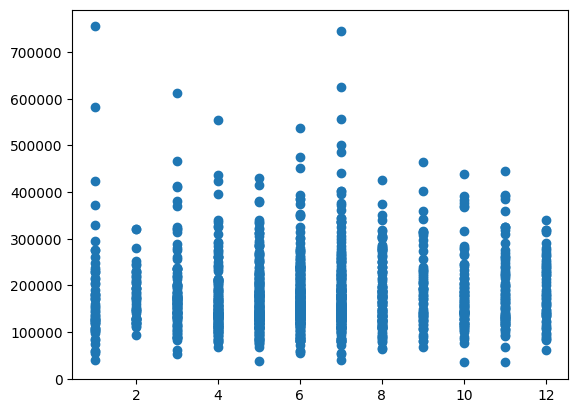

In [630]:
plt.scatter(x="MoSold" , y="SalePrice", data=train_df)

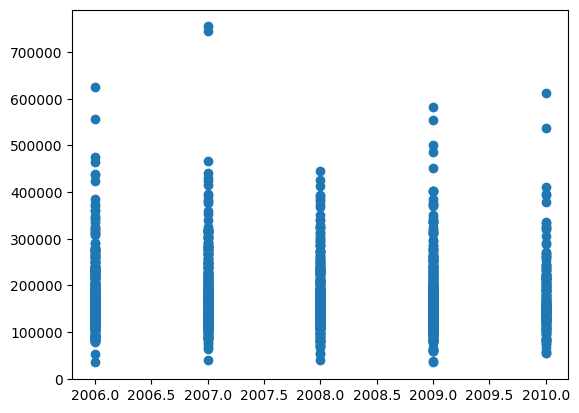

In [631]:
plt.scatter(x="YrSold" , y="SalePrice", data=train_df)

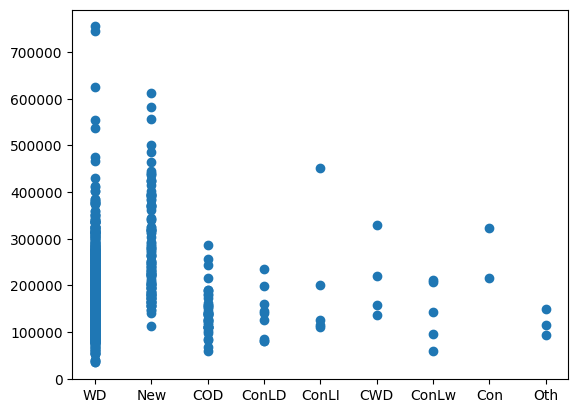

In [632]:
plt.scatter(x="SaleType" , y="SalePrice", data=train_df)

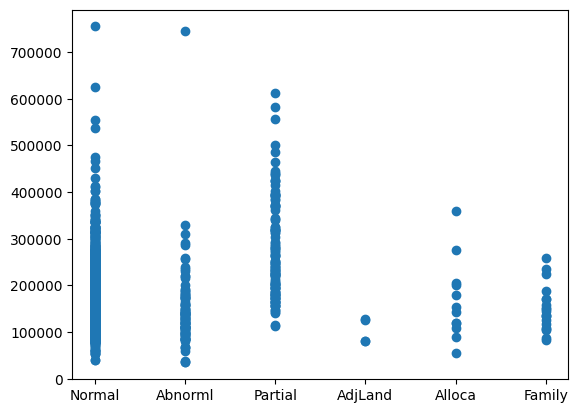

In [633]:
plt.scatter(x="SaleCondition" , y="SalePrice", data=train_df)

In [634]:
values = [198,54,524,692,1183,1299,323,298,1170,250,314,336,707,20,60,496,584,1329,1231,1271]

In [635]:
train_df = train_df[train_df.Id.isin(values) == False]


In [636]:
pd.DataFrame(train_df.isnull().sum().sort_values(ascending= False)).head(30)

,0
PoolQC,1436
MiscFeature,1390
Alley,1351
Fence,1166
MasVnrType,860
FireplaceQu,687
LotFrontage,254
GarageYrBlt,80
GarageCond,80
GarageType,80


In [637]:
train_df["MiscFeature"].unique()

array([nan, 'Shed', 'Gar2', 'Othr', 'TenC'], dtype=object)

In [638]:
train_df["Alley"].unique()

array([nan, 'Grvl', 'Pave'], dtype=object)

In [639]:
train_df["Alley"] = train_df["Alley"].fillna("No")
test_df["Alley"] = test_df["Alley"].fillna("No")

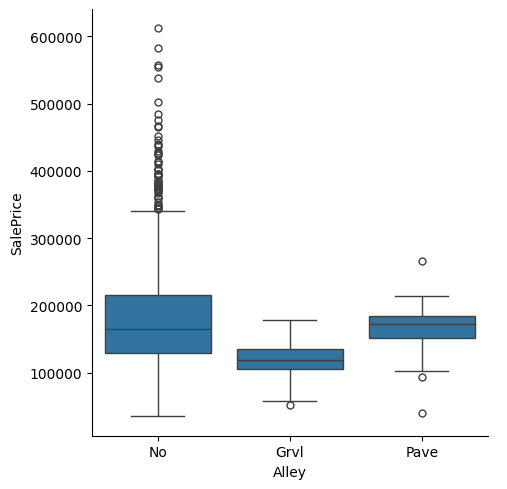

In [640]:
sns.catplot(data=train_df , x="Alley",y="SalePrice" , kind="box")

In [641]:
train_df['Fence'].unique()

array([nan, 'MnPrv', 'GdWo', 'GdPrv', 'MnWw'], dtype=object)

In [642]:
train_df["Fence"] = train_df["Fence"].fillna("No")
test_df["Fence"] = test_df["Fence"].fillna("No")

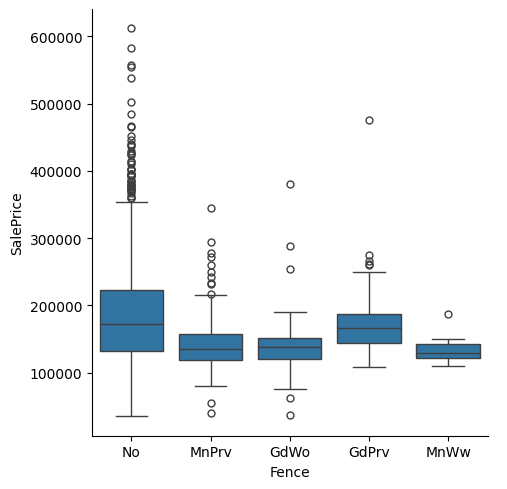

In [643]:
sns.catplot(data=train_df , x="Fence",y="SalePrice" , kind="box")

In [644]:
train_df['MasVnrType'].unique()

array(['BrkFace', nan, 'Stone', 'BrkCmn'], dtype=object)

In [645]:
train_df["MasVnrType"] = train_df["MasVnrType"].fillna("No")
test_df["MasVnrType"] = test_df["MasVnrType"].fillna("No")

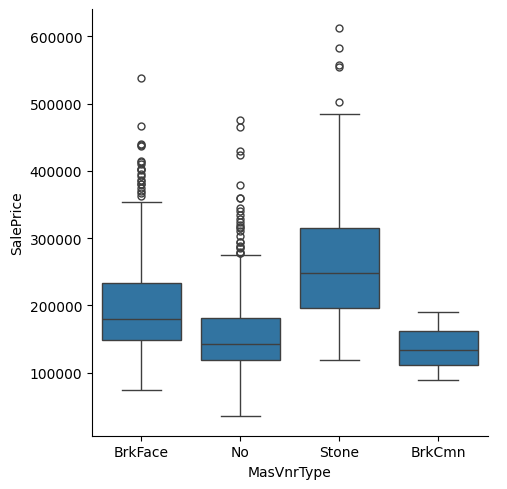

In [646]:
sns.catplot(data=train_df , x="MasVnrType",y="SalePrice" , kind="box")

In [647]:
train_df['FireplaceQu'].unique()

array([nan, 'TA', 'Gd', 'Fa', 'Ex', 'Po'], dtype=object)

In [648]:
train_df["FireplaceQu"] = train_df["FireplaceQu"].fillna("No")
test_df["FireplaceQu"] = test_df["FireplaceQu"].fillna("No")

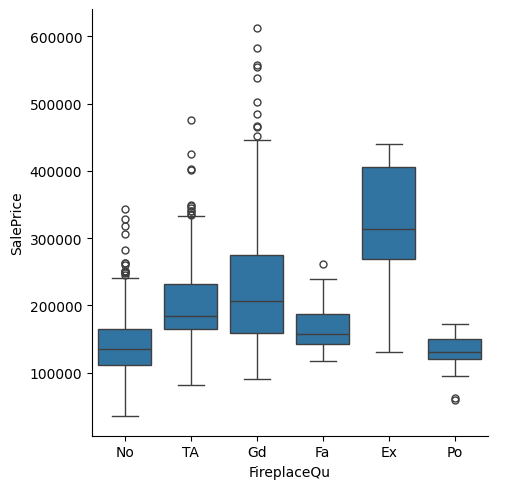

In [649]:
sns.catplot(data=train_df , x="FireplaceQu",y="SalePrice" , kind="box")

In [650]:
train_df['LotFrontage'].unique()

array([ 65.,  80.,  68.,  60.,  84.,  85.,  75.,  nan,  51.,  50.,  70.,
        91.,  72.,  66., 101.,  57.,  44., 110.,  98.,  47., 108., 112.,
        74., 115.,  61.,  48.,  33.,  52., 100.,  24.,  89.,  63.,  76.,
        81.,  95.,  69.,  21.,  32.,  78., 121., 122.,  40., 105.,  73.,
        77.,  64.,  94.,  34.,  90.,  55.,  88.,  82.,  71., 120., 107.,
        92., 134.,  62.,  86., 141.,  97.,  54.,  41.,  79.,  99.,  67.,
        83.,  43., 103., 174.,  93.,  30., 129., 140.,  35.,  37., 118.,
        87., 116., 111.,  49.,  96.,  59.,  36.,  56., 102.,  58.,  38.,
       109., 130.,  53., 137.,  45., 106.,  42.,  39., 104., 144., 114.,
       128., 149., 313., 168., 182., 138., 152., 124., 153.,  46.])

In [651]:
train_df["LotFrontage"] = train_df["LotFrontage"].fillna("0")
test_df["LotFrontage"] = test_df["LotFrontage"].fillna("0")

In [652]:
train_df['GarageYrBlt'].corr(train_df['YearBuilt'])

0.8271774228441907

In [653]:
train_df["GarageCond"].unique()

array(['TA', 'Fa', nan, 'Gd', 'Po', 'Ex'], dtype=object)

In [654]:
train_df["GarageCond"] = train_df["GarageCond"].fillna("No")
test_df["GarageCond"] = test_df["GarageCond"].fillna("No")

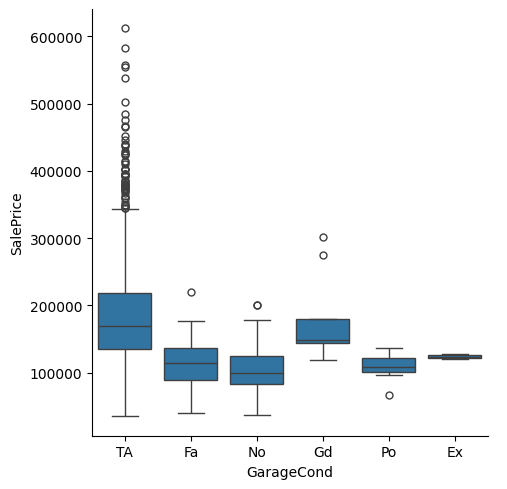

In [655]:
sns.catplot(data=train_df , x="GarageCond",y="SalePrice" , kind="box")

In [656]:
train_df["GarageType"].unique()

array(['Attchd', 'Detchd', 'BuiltIn', 'CarPort', nan, 'Basment', '2Types'],
      dtype=object)

In [657]:
train_df["GarageType"] = train_df["GarageType"].fillna("No")
test_df["GarageType"] = test_df["GarageType"].fillna("No")

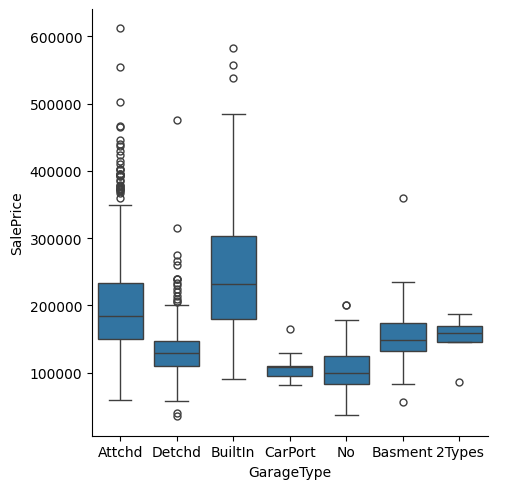

In [658]:
sns.catplot(data=train_df , x="GarageType",y="SalePrice" , kind="box")

In [659]:
train_df["GarageFinish"].unique()

array(['RFn', 'Unf', 'Fin', nan], dtype=object)

In [660]:
train_df["GarageFinish"] = train_df["GarageFinish"].fillna("No")
test_df["GarageFinish"] = test_df["GarageFinish"].fillna("No")

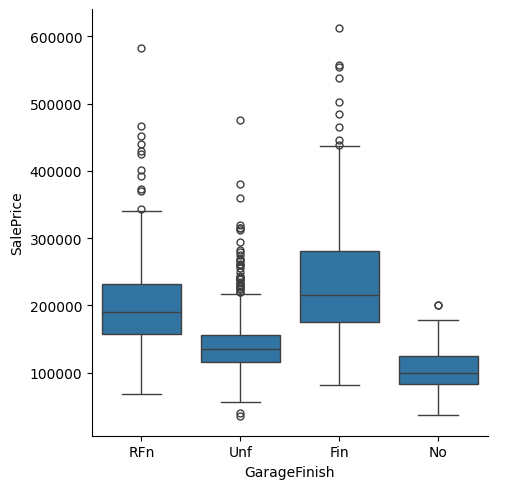

In [661]:
sns.catplot(data=train_df , x="GarageFinish",y="SalePrice" , kind="box")

In [662]:
train_df["GarageQual"].unique()

array(['TA', 'Fa', 'Gd', nan, 'Ex', 'Po'], dtype=object)

In [663]:
train_df["GarageQual"] = train_df["GarageQual"].fillna("No")
test_df["GarageQual"] = test_df["GarageQual"].fillna("No")

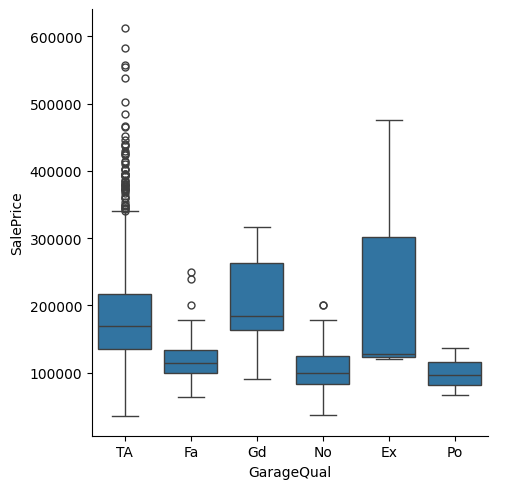

In [664]:
sns.catplot(data=train_df , x="GarageQual",y="SalePrice" , kind="box")

In [665]:
train_df["BsmtFinType2"].unique()

array(['Unf', 'BLQ', nan, 'ALQ', 'Rec', 'LwQ', 'GLQ'], dtype=object)

In [666]:
train_df["BsmtFinType2"] = train_df["BsmtFinType2"].fillna("No")
test_df["BsmtFinType2"] = test_df["BsmtFinType2"].fillna("No")

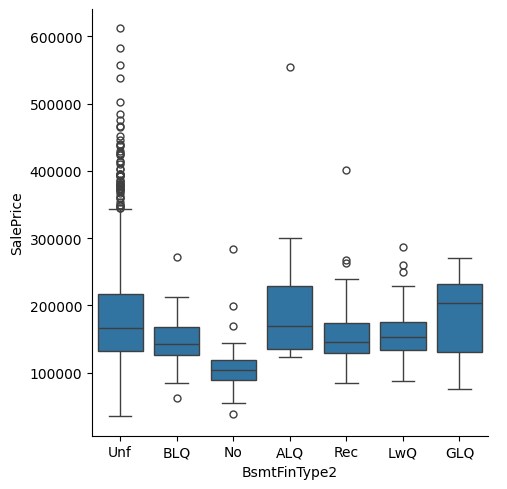

In [667]:
sns.catplot(data=train_df , x="BsmtFinType2",y="SalePrice" , kind="box")

In [668]:
train_df["BsmtExposure"].unique()

array(['No', 'Gd', 'Mn', 'Av', nan], dtype=object)

In [669]:
train_df["BsmtExposure"] = train_df["BsmtExposure"].fillna("Unf")
test_df["BsmtExposure"] = test_df["BsmtExposure"].fillna("Unf")

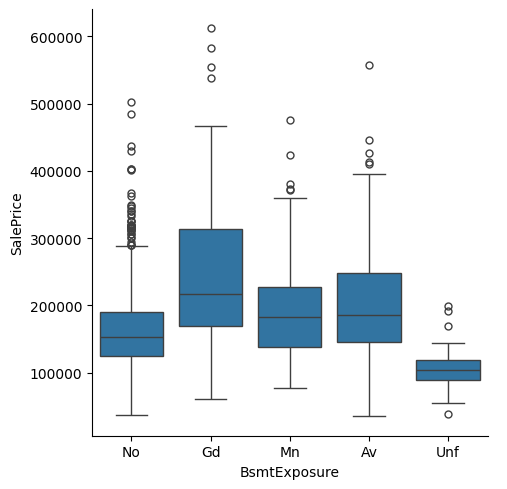

In [670]:
sns.catplot(data=train_df , x="BsmtExposure",y="SalePrice" , kind="box")

In [671]:
train_df["BsmtQual"].unique()

array(['Gd', 'TA', 'Ex', nan, 'Fa'], dtype=object)

In [672]:
train_df["BsmtQual"] = train_df["BsmtQual"].fillna("No")
test_df["BsmtQual"] = test_df["BsmtQual"].fillna("No")

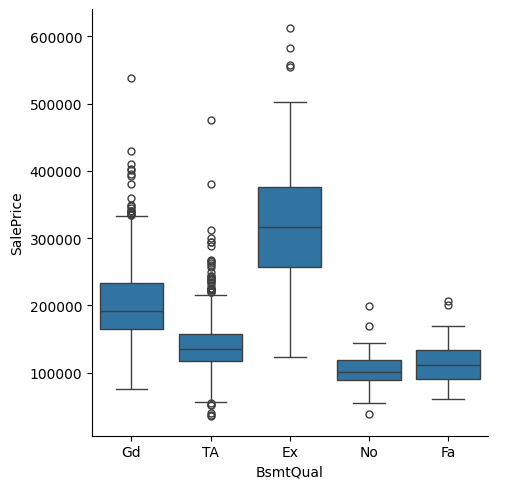

In [673]:
sns.catplot(data=train_df , x="BsmtQual",y="SalePrice" , kind="box")

In [674]:
train_df["BsmtCond"].unique()

array(['TA', 'Gd', nan, 'Fa', 'Po'], dtype=object)

In [675]:
train_df["BsmtCond"] = train_df["BsmtCond"].fillna("No")
test_df["BsmtCond"] = test_df["BsmtCond"].fillna("No")

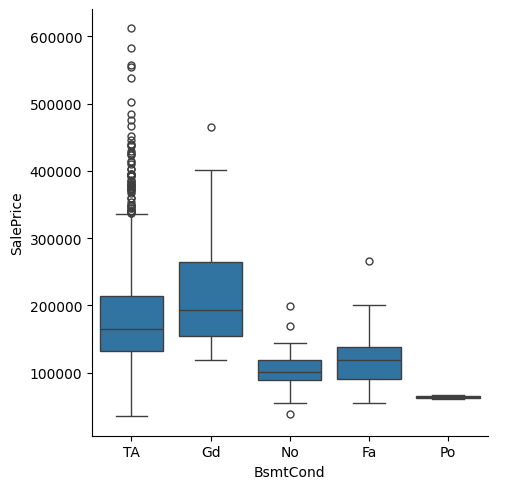

In [676]:
sns.catplot(data=train_df , x="BsmtCond",y="SalePrice" , kind="box")

In [677]:
train_df["BsmtFinType1"].unique()

array(['GLQ', 'ALQ', 'Unf', 'Rec', 'BLQ', nan, 'LwQ'], dtype=object)

In [678]:
train_df["BsmtFinType1"] = train_df["BsmtFinType1"].fillna("No")
test_df["BsmtFinType1"] = test_df["BsmtFinType1"].fillna("No")

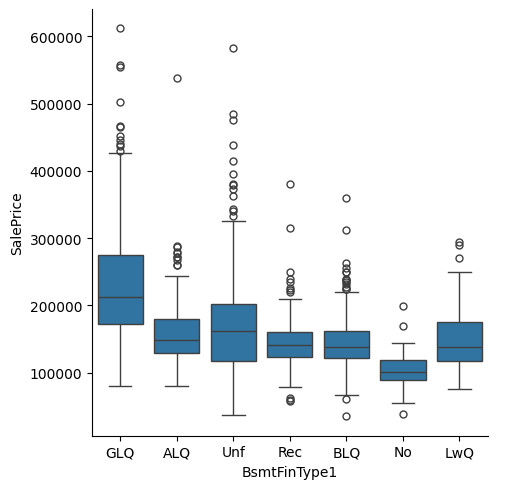

In [679]:
sns.catplot(data=train_df , x="BsmtFinType1",y="SalePrice" , kind="box")

In [680]:
train_df["MasVnrArea"] = train_df["MasVnrArea"].fillna("0")
test_df["MasVnrArea"] = test_df["MasVnrArea"].fillna("0")

In [681]:
train_df["Electrical"].unique()

array(['SBrkr', 'FuseF', 'FuseA', 'FuseP', 'Mix', nan], dtype=object)

In [682]:
train_df["Electrical"] = train_df["Electrical"].fillna("SBrkr")
test_df["Electrical"] = test_df["Electrical"].fillna("SBrkr")

In [683]:
train_df= train_df.drop(columns=["PoolQC","MiscFeature","Alley", "Fence","GarageYrBlt","GarageCond","BsmtFinType2" ])


In [684]:
test_df=test_df.drop(columns=["PoolQC","MiscFeature","Alley", "Fence","GarageYrBlt","GarageCond","BsmtFinType2" ])

In [685]:
# feature engineering

In [686]:
train_df["houseage"] = train_df["YrSold"] - train_df["YearBuilt"]
test_df["houseage"] = test_df["YrSold"] - test_df["YearBuilt"]

In [687]:
train_df["housseremodage"] = train_df["YrSold"] - train_df["YearRemodAdd"]
test_df["housseremodage"] = test_df["YrSold"] - test_df["YearRemodAdd"]

In [688]:
train_df["totalsf"] = train_df["1stFlrSF"] + train_df["2ndFlrSF"] + train_df["BsmtFinSF1"] + train_df["BsmtFinSF2"]
test_df["totalsf"] = test_df["1stFlrSF"] + test_df["2ndFlrSF"] + test_df["BsmtFinSF1"] + test_df["BsmtFinSF2"]

In [689]:
train_df["totalarea"] = train_df["GrLivArea"] + train_df["TotalBsmtSF"]
test_df["totalarea"] = test_df["GrLivArea"] + test_df["TotalBsmtSF"]

In [690]:
train_df["totalbaths"] = train_df["FullBath"] + train_df["BsmtFullBath"] + 0.5 * (train_df["HalfBath"] + train_df["BsmtHalfBath"])
test_df["totalbaths"] = test_df["FullBath"] + test_df["BsmtFullBath"] + 0.5 * (test_df["HalfBath"] + test_df["BsmtHalfBath"])

In [691]:
train_df["totalprochsf"] = train_df["OpenPorchSF"] + train_df["ScreenPorch"] + train_df["3SsnPorch"] + train_df["EnclosedPorch"] 
test_df["totalprochsf"] = test_df["OpenPorchSF"] + test_df["ScreenPorch"] + test_df["3SsnPorch"] + test_df["EnclosedPorch"] 

In [692]:
train_df = train_df.drop(columns=['Id','YrSold','YearBuilt','YearRemodAdd','1stFlrSF','2ndFlrSF','BsmtFinSF1','BsmtFinSF2','GrLivArea','TotalBsmtSF','FullBath','BsmtFullBath','HalfBath','BsmtHalfBath','OpenPorchSF','ScreenPorch','3SsnPorch','EnclosedPorch'])
test_df = test_df.drop(columns=['YrSold','YearBuilt','YearRemodAdd','1stFlrSF','2ndFlrSF','BsmtFinSF1','BsmtFinSF2','GrLivArea','TotalBsmtSF','FullBath','BsmtFullBath','HalfBath','BsmtHalfBath','OpenPorchSF','ScreenPorch','3SsnPorch','EnclosedPorch'])

<Axes: >

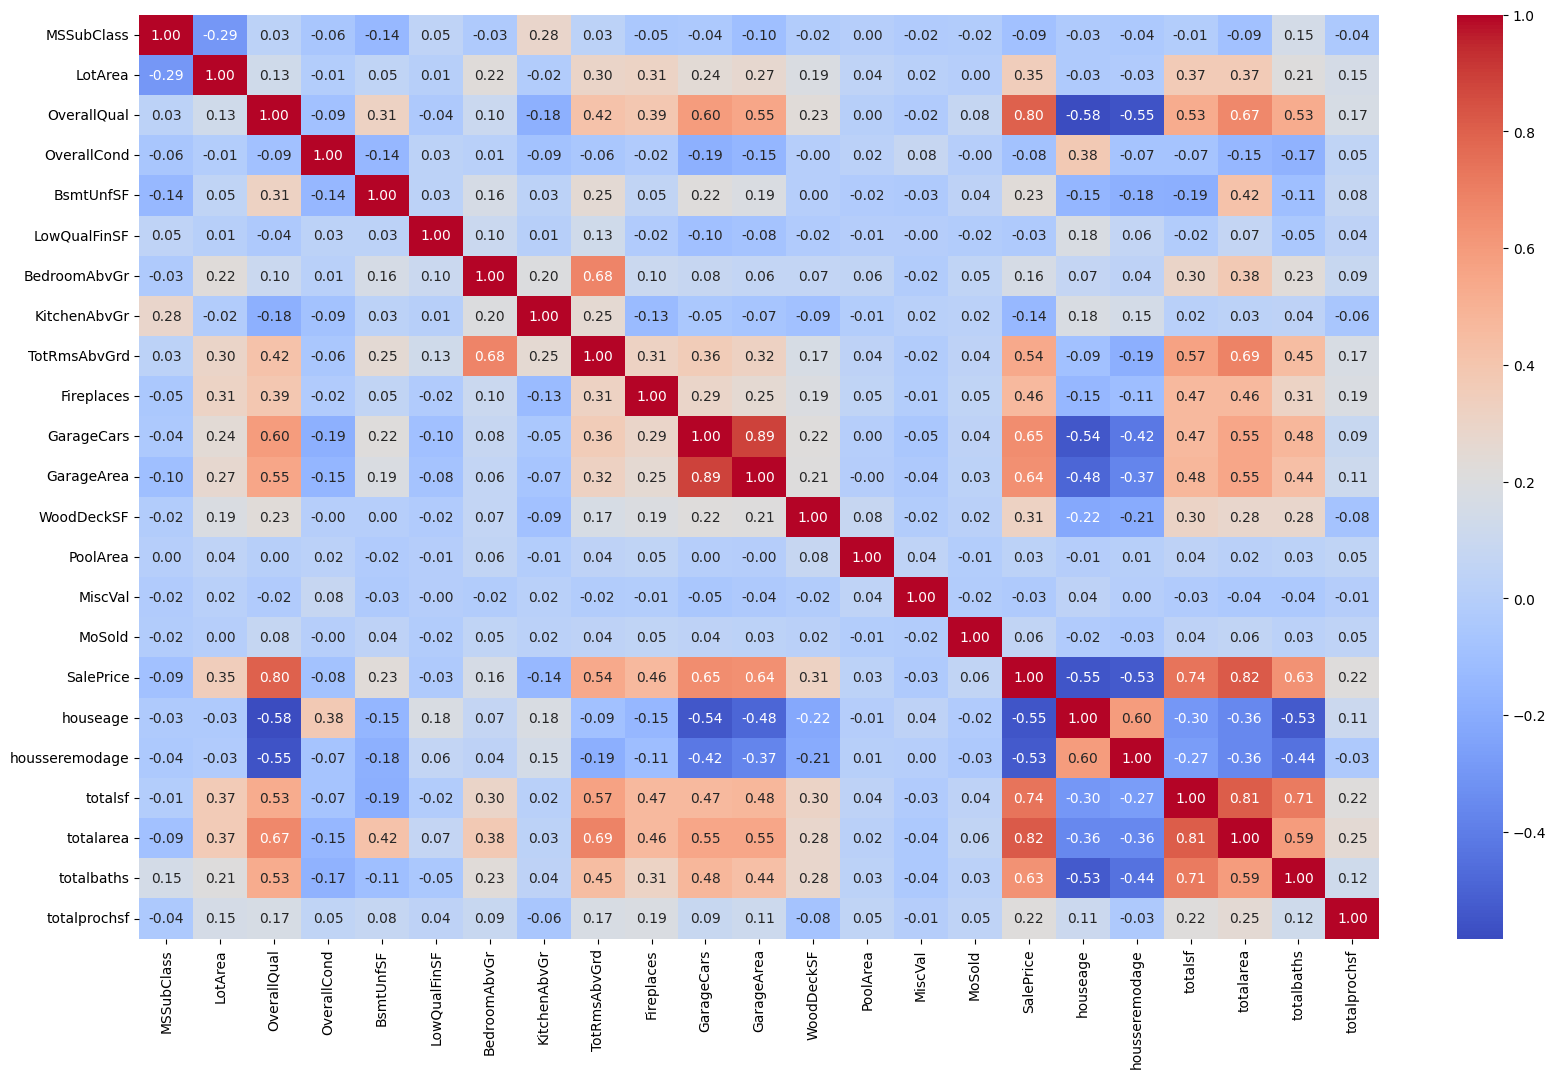

In [693]:
correlation_matrix = train_df.corr(numeric_only=True)
plt.figure(figsize=(20,12))
sns.heatmap(correlation_matrix,annot=True,cmap='coolwarm' , fmt=".2f")

In [694]:
#drop GaragrArea or GarageCars

In [695]:
train_df = train_df.drop(columns =['GarageArea'])
test_df = test_df.drop(columns =['GarageArea'])

<Axes: xlabel='SalePrice', ylabel='Count'>

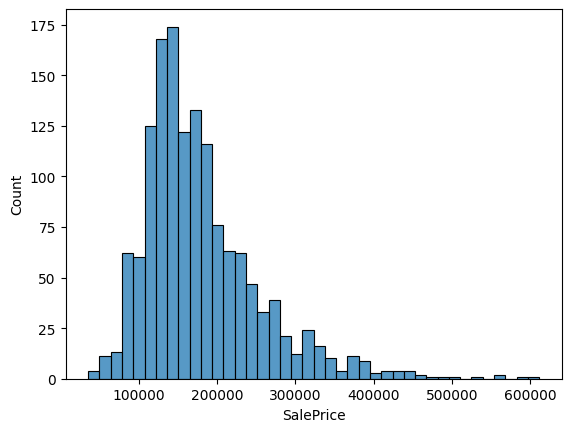

In [696]:
sns.histplot(
    train_df,
    x= train_df["SalePrice"]
)

In [697]:
train_df["SalePrice"] = np.log1p(train_df["SalePrice"])

<Axes: xlabel='SalePrice', ylabel='Count'>

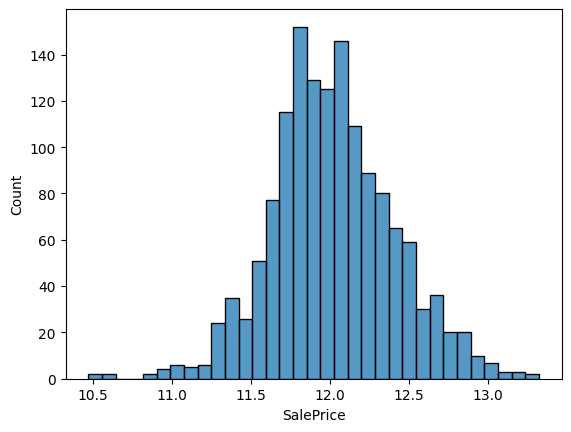

In [698]:
sns.histplot(
    train_df,
    x= train_df["SalePrice"]
)

In [699]:
train_df.dtypes[train_df.dtypes == 'object']

MSZoning         object
LotFrontage      object
Street           object
LotShape         object
LandContour      object
Utilities        object
LotConfig        object
LandSlope        object
Neighborhood     object
Condition1       object
Condition2       object
BldgType         object
HouseStyle       object
RoofStyle        object
RoofMatl         object
Exterior1st      object
Exterior2nd      object
MasVnrType       object
MasVnrArea       object
ExterQual        object
ExterCond        object
Foundation       object
BsmtQual         object
BsmtCond         object
BsmtExposure     object
BsmtFinType1     object
Heating          object
HeatingQC        object
CentralAir       object
Electrical       object
KitchenQual      object
Functional       object
FireplaceQu      object
GarageType       object
GarageFinish     object
GarageQual       object
PavedDrive       object
SaleType         object
SaleCondition    object
dtype: object

In [700]:
train_df.dtypes[train_df.dtypes !='object' ]

MSSubClass          int64
LotArea             int64
OverallQual         int64
OverallCond         int64
BsmtUnfSF           int64
LowQualFinSF        int64
BedroomAbvGr        int64
KitchenAbvGr        int64
TotRmsAbvGrd        int64
Fireplaces          int64
GarageCars          int64
WoodDeckSF          int64
PoolArea            int64
MiscVal             int64
MoSold              int64
SalePrice         float64
houseage            int64
housseremodage      int64
totalsf             int64
totalarea           int64
totalbaths        float64
totalprochsf        int64
dtype: object

In [701]:
ode_cols = [
    "LotShape", "LandSlope", "ExterQual", "ExterCond", "Utilities", 
    "BsmtQual", "BsmtCond", "BsmtExposure", "BsmtFinType1", "LandContour",
    "HeatingQC", "KitchenQual", "FireplaceQu", "GarageFinish", "CentralAir",
    "GarageQual", "PavedDrive", "Functional"
]

In [702]:
ohe_cols = [
    "MSZoning", "Street", "LotConfig", 
    "Neighborhood", "Condition1", "Condition2", "BldgType", "HouseStyle", 
    "RoofStyle", "RoofMatl", "Exterior1st", "Exterior2nd", "MasVnrType", 
    "Foundation", "Heating", "Electrical", "GarageType", 
    "SaleType", "SaleCondition"
]

In [703]:
num_cols = train_df.select_dtypes(include=['int64','float64']).columns
num_cols = num_cols.drop('SalePrice')


In [704]:
ode_pipeline = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),  
    ("ode", OrdinalEncoder(handle_unknown="use_encoded_value", unknown_value=-1))  
])

In [705]:
num_pipeline = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="mean")), 
    ("scaler", StandardScaler())  
])

In [706]:

ohe_pipeline = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),  # Remplace les NaN par la valeur la plus fréquente
    ("ohe", OneHotEncoder(handle_unknown="ignore", sparse_output=False))  # Encode les catégories en one-hot
])


In [707]:
col_trans = ColumnTransformer(transformers=[
    ('num_p', num_pipeline, num_cols),
    ('ode_p', ode_pipeline, ode_cols),
    ('ohe_p', ohe_pipeline, ohe_cols),
    ],
    remainder='passthrough', 
    n_jobs=-1)

In [708]:
pipeline = Pipeline(steps=[
    ('preprocessing', col_trans)
])


In [709]:
X = train_df.drop('SalePrice', axis=1)
y = train_df['SalePrice']

In [710]:
X_preprocessed = pipeline.fit_transform(X)


In [711]:
df_test_preprocess = pipeline.transform(test_df)

In [712]:
X_train, X_test, y_train, y_test = train_test_split(X_preprocessed, y, test_size=0.2, random_state=25)

In [713]:
lr = LinearRegression()

In [714]:
lr.fit(X_train, y_train)

LinearRegression()

In [715]:
y_pred_lr = lr.predict(X_test)

In [716]:
mean_squared_error(y_test, y_pred_lr)

0.013820790722949514

In [717]:
mae = mean_absolute_error(y_test, y_pred_lr)
print("MAE:", mae)

MAE: 0.08295409232178358


In [718]:
r2 = r2_score(y_test, y_pred_lr)
print("R² Score:", r2)

R² Score: 0.9044178342659961


In [765]:
coefficients = lr.coef_

coef_df = pd.DataFrame({'Coefficient': coefficients})
coef_df = coef_df.sort_values(by="Coefficient", ascending=False)
print(coef_df)


     Coefficient
181     0.202743
41      0.150213
73      0.145587
115     0.139018
136     0.126456
..           ...
168    -0.156288
160    -0.160465
189    -0.174677
25     -0.245628
39     -0.380865

[192 rows x 1 columns]


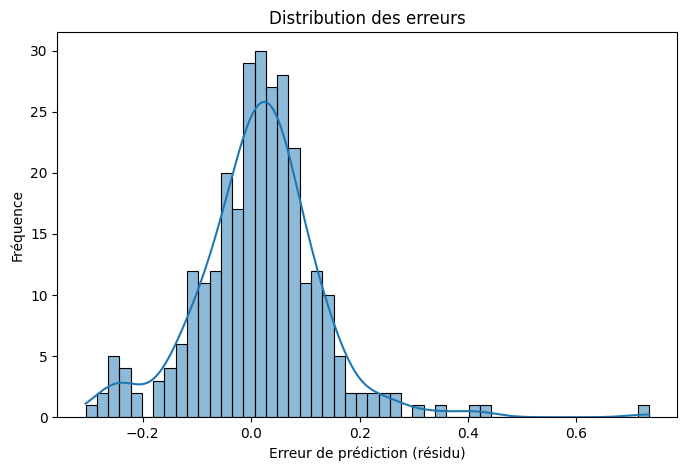

In [ ]:
residuals = y_test - y_pred_lr

plt.figure(figsize=(8,5))
sns.histplot(residuals, bins=50, kde=True)
plt.xlabel("Erreur de prédiction (résidu)")
plt.ylabel("Fréquence")
plt.title("Distribution des erreurs")
plt.show()

In [ ]:
RFR = RandomForestRegressor(random_state=13)

In [722]:
param_grid_RFR = {
    'max_depth': [5, 10, 15],
    'n_estimators': [100, 250, 500],
    'min_samples_split': [3, 5, 10]
}

In [723]:
rfr_cv = GridSearchCV(RFR, param_grid_RFR, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

In [724]:
rfr_cv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=13), n_jobs=-1,
             param_grid={'max_depth': [5, 10, 15],
                         'min_samples_split': [3, 5, 10],
                         'n_estimators': [100, 250, 500]},
             scoring='neg_mean_squared_error')

In [725]:
np.sqrt(-1 * rfr_cv.best_score_)

0.1372147645833581

In [726]:
rfr_cv.best_params_

{'max_depth': 15, 'min_samples_split': 3, 'n_estimators': 500}

In [727]:
XGB = XGBRegressor(random_state=13)

In [728]:
param_grid_XGB = {
    'learning_rate': [0.05, 0.1, 0.2],
    'n_estimators': [300],
    'max_depth': [3],
    'min_child_weight': [1,2,3],
    'gamma': [0, 0.1, 0.2],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0],
}

In [729]:
xgb_cv = GridSearchCV(XGB, param_grid_XGB, cv=3, scoring='neg_mean_squared_error', n_jobs=-1)

In [730]:
xgb_cv.fit(X_train, y_train)

GridSearchCV(cv=3,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=13, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.8, 0.9, 1.0],
                         'gamma': [0, 0.1, 0.2],
                         'learning_rate': [0.05, 0.1, 0.2], 'max_depth': [3],
                         'min_child_weight': [1, 2, 3], 'n_estimators': [300],
                         'subsample': [0.8, 0.9, 1.0]},
             scoring='neg_mean_squared_error')

In [731]:
np.sqrt(-1 * xgb_cv.best_score_)

0.1213401593841146

In [732]:
xgb_cv.best_params_

{'colsample_bytree': 0.8,
 'gamma': 0,
 'learning_rate': 0.05,
 'max_depth': 3,
 'min_child_weight': 1,
 'n_estimators': 300,
 'subsample': 0.8}

In [733]:
ridge = Ridge()

Ridge : Il s’agit d’un modèle de régression linéaire régularisée.
Contrairement à la régression linéaire classique, Ridge Regression ajoute une pénalité L2 pour éviter le sur-apprentissage (overfitting).
L’objectif de Ridge est de réduire l’impact des coefficients trop grands en leur appliquant une pénalité proportionnelle à leur carré.

In [734]:
param_grid_ridge = {
    'alpha': [0.05, 0.1, 1, 3, 5, 10],
    'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag']
}

In [735]:
ridge_cv = GridSearchCV(ridge, param_grid_ridge, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

In [736]:
ridge_cv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=Ridge(), n_jobs=-1,
             param_grid={'alpha': [0.05, 0.1, 1, 3, 5, 10],
                         'solver': ['auto', 'svd', 'cholesky', 'lsqr',
                                    'sparse_cg', 'sag']},
             scoring='neg_mean_squared_error')

In [737]:
np.sqrt(-1 * ridge_cv.best_score_)

0.11568502991360642

In [738]:
GBR = GradientBoostingRegressor()

In [739]:
param_grid_GBR = {
    'max_depth': [12, 15, 20],
    'n_estimators': [200, 300, 1000],
    'min_samples_leaf': [10, 25, 50],
    'learning_rate': [0.001, 0.01, 0.1],
    'max_features': [0.01, 0.1, 0.7]
}

In [740]:
GBR_cv = GridSearchCV(GBR, param_grid_GBR, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

In [741]:
GBR_cv.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(), n_jobs=-1,
             param_grid={'learning_rate': [0.001, 0.01, 0.1],
                         'max_depth': [12, 15, 20],
                         'max_features': [0.01, 0.1, 0.7],
                         'min_samples_leaf': [10, 25, 50],
                         'n_estimators': [200, 300, 1000]},
             scoring='neg_mean_squared_error')

In [742]:
np.sqrt(-1 * GBR_cv.best_score_)

0.11974879966246853

In [743]:
lgbm_regressor = lgb.LGBMRegressor()

In [744]:
param_grid_lgbm = {
    'boosting_type': ['gbdt', 'dart'],
    'num_leaves': [20, 30, 40],
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators': [100, 200, 300]
}

In [745]:
lgbm_cv = GridSearchCV(lgbm_regressor, param_grid_lgbm, cv=3, scoring='neg_mean_squared_error', n_jobs=-1)

In [746]:
lgbm_cv.fit(X_train, y_train)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000967 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2036
[LightGBM] [Info] Number of data points in the train set: 1152, number of used features: 119
[LightGBM] [Info] Start training from score 12.021522


GridSearchCV(cv=3, estimator=LGBMRegressor(), n_jobs=-1,
             param_grid={'boosting_type': ['gbdt', 'dart'],
                         'learning_rate': [0.01, 0.05, 0.1],
                         'n_estimators': [100, 200, 300],
                         'num_leaves': [20, 30, 40]},
             scoring='neg_mean_squared_error')

In [747]:
np.sqrt(-1 * lgbm_cv.best_score_)

0.1307776747244555

In [748]:
catboost = CatBoostRegressor(loss_function='RMSE', verbose=False)

In [749]:
param_grid_cat ={
    'iterations': [100, 500, 1000],
    'depth': [4, 6, 8, 10],
    'learning_rate': [0.01, 0.05, 0.1, 0.5]
}

In [750]:
cat_cv = GridSearchCV(catboost, param_grid_cat, cv=3, scoring='neg_mean_squared_error', n_jobs=-1)

In [751]:
cat_cv.fit(X_train, y_train)

GridSearchCV(cv=3,
             estimator=<catboost.core.CatBoostRegressor object at 0x000001CDEA06AEA0>,
             n_jobs=-1,
             param_grid={'depth': [4, 6, 8, 10], 'iterations': [100, 500, 1000],
                         'learning_rate': [0.01, 0.05, 0.1, 0.5]},
             scoring='neg_mean_squared_error')

In [752]:
np.sqrt(-1 * cat_cv.best_score_)

0.12079738117343954

In [755]:
vr = VotingRegressor([('gbr', GBR_cv.best_estimator_),
                      ('xgb', xgb_cv.best_estimator_),
                      ('ridge', ridge_cv.best_estimator_)],
                    weights=[2,3,1])

Le Voting Regressor calcule la moyenne pondérée des prédictions.

In [756]:
vr.fit(X_train, y_train)

VotingRegressor(estimators=[('gbr',
                             GradientBoostingRegressor(learning_rate=0.01,
                                                       max_depth=12,
                                                       max_features=0.1,
                                                       min_samples_leaf=10,
                                                       n_estimators=1000)),
                            ('xgb',
                             XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=0.8, device=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_m...
                                          interaction_constraints=None,
                                          learning_rate=0.05, max_bin=None,
                                          max_cat_threshold=None,
                                          max_cat_to_onehot=None,
                                          max_delta_step=None, max_depth=3,
                                          max_leaves=None, min_child_weight=1,
                                          missing=nan,
                                          monotone_constraints=None,
                                          multi_strategy=None, n_estimators=300,
                                          n_jobs=None, num_parallel_tree=None,
                                          random_state=13, ...)),
                            ('ridge', Ridge(alpha=10, solver='svd'))],
                weights=[2, 3, 1])

In [757]:
y_pred_vr = vr.predict(X_test)

In [ ]:
mean_squared_error(y_test, y_pred_vr)

0.009272821431505087

In [759]:
estimators = [
    ('gbr', GBR_cv.best_estimator_),
    ('xgb', xgb_cv.best_estimator_),
    ('cat', cat_cv.best_estimator_),
    ('lgb', lgbm_cv.best_estimator_),
    ('rfr', rfr_cv.best_estimator_),
]

In [760]:
stackreg = StackingRegressor(
            estimators = estimators,
            final_estimator = vr
)

In [761]:
stackreg.fit(X_train, y_train)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000394 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2036
[LightGBM] [Info] Number of data points in the train set: 1152, number of used features: 119
[LightGBM] [Info] Start training from score 12.021522
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000861 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1907
[LightGBM] [Info] Number of data points in the train set: 921, number of used features: 108
[LightGBM] [Info] Start training from score 12.024058
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000643 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enou

C:\Users\anadj\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
C:\Users\anadj\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001134 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1908
[LightGBM] [Info] Number of data points in the train set: 922, number of used features: 108
[LightGBM] [Info] Start training from score 12.027190


C:\Users\anadj\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
C:\Users\anadj\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000698 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1912
[LightGBM] [Info] Number of data points in the train set: 922, number of used features: 110
[LightGBM] [Info] Start training from score 12.029317
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001277 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1915
[LightGBM] [Info] Number of data points in the train set: 922, number of used features: 110
[LightGBM] [Info] Start training from score 12.011892


C:\Users\anadj\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


StackingRegressor(estimators=[('gbr',
                               GradientBoostingRegressor(learning_rate=0.01,
                                                         max_depth=12,
                                                         max_features=0.1,
                                                         min_samples_leaf=10,
                                                         n_estimators=1000)),
                              ('xgb',
                               XGBRegressor(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=0.8, device=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval...
                                                                            interaction_constraints=None,
                                                                            learning_rate=0.05,
                                                                            max_bin=None,
                                                                            max_cat_threshold=None,
                                                                            max_cat_to_onehot=None,
                                                                            max_delta_step=None,
                                                                            max_depth=3,
                                                                            max_leaves=None,
                                                                            min_child_weight=1,
                                                                            missing=nan,
                                                                            monotone_constraints=None,
                                                                            multi_strategy=None,
                                                                            n_estimators=300,
                                                                            n_jobs=None,
                                                                            num_parallel_tree=None,
                                                                            random_state=13, ...)),
                                                              ('ridge',
                                                               Ridge(alpha=10,
                                                                     solver='svd'))],
                                                  weights=[2, 3, 1]))

In [762]:
y_pred_stack = stackreg.predict(X_test)

C:\Users\anadj\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


In [763]:
mean_squared_error(y_test, y_pred_stack)

0.010906888772825977

In [ ]:
y_stacking = np.exp(vr.predict(df_test_preprocess))

df_y_stacking_out = test_df[['Id']]
df_y_stacking_out['SalePrice'] = y_stacking

df_y_stacking_out.to_csv('submission.csv', index=False)

C:\Users\anadj\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
C:\Users\anadj\AppData\Local\Temp\ipykernel_12728\176896153.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_y_stacking_out['SalePrice'] = y_stacking
